My notebook for the [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer/) Competition

In [107]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [108]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

import numpy as np
import pandas as pd

In [109]:
PATH = 'data/'
!ls {PATH}

models                test.csv              train.csv
sample_submission.csv tmp


In [110]:
train_df = pd.read_csv("./data/train.csv")

print(train_df.shape)
train_df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
test_df = pd.read_csv("./data/test.csv")

print(test_df.shape)
train_df.head()

(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Display some data

1, 2, 5, 9, 4


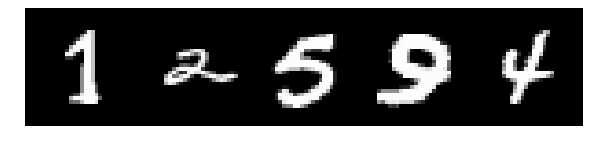

In [112]:
from torchvision.utils import make_grid

random_sel = np.random.randint(len(train_df), size=5)

grid = make_grid(torch.Tensor((train_df.iloc[random_sel, 1:].as_matrix()/255.).reshape((-1, 28, 28))).unsqueeze(1), nrow=8)
plt.rcParams['figure.figsize'] = (10, 3)
plt.imshow(grid.numpy().transpose((1,2,0)))
plt.axis('off')
print(*list(train_df.iloc[random_sel, 0].values), sep = ', ')

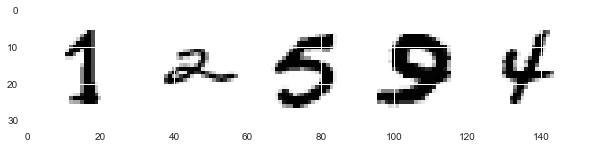

In [113]:
plt.imshow(grid[0])

Train the CNN

In [114]:
train_imgs = train_df.iloc[:,1:].values.reshape((-1,28,28)).astype(np.uint8)[:,:,:,None]
len(train_imgs)

42000

In [115]:
numbers = torch.from_numpy(train_df.iloc[:,0].values)
len(number)

42000

In [116]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 8400
n_trn = len(train_imgs)-n_valid
y_train, y_valid = split_vals(numbers, n_trn)
X_train, X_valid = split_vals(train_imgs, n_trn)

In [117]:
print(y_train.shape)
print(y_valid.shape)
print(X_train.shape)
print(X_valid.shape)

torch.Size([33600])
torch.Size([8400])
(33600, 28, 28, 1)
(8400, 28, 28, 1)


In [118]:
X_train_3 = np.broadcast_to(X_train, (33600, 28, 28, 3))
X_valid_3 = np.broadcast_to(X_valid, (8400, 28, 28, 3))
print(X_train_3.shape)
print(X_valid_3.shape)

(33600, 28, 28, 3)
(8400, 28, 28, 3)


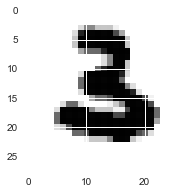

In [119]:
plt.imshow(X_valid_3[10,:,:,1])

In [120]:
arch=resnet50
sz=28
bs=32

data = ImageClassifierData.from_arrays(PATH, trn=(X_train_3, y_train), val=(X_valid_3, y_valid), bs=bs, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy                      
    0      0.437188   0.392599   0.90881   
    1      0.370811   0.401364   0.921786                      



[array([ 0.40136]), 0.92178571428571432]

In [121]:
learn

Sequential(
  (0): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True)
  (1): Dropout(p=0.25)
  (2): Linear(in_features=4096, out_features=512)
  (3): ReLU()
  (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=512, out_features=10)
  (7): LogSoftmax()
)

 72%|███████▏  | 758/1050 [00:38<00:14, 19.70it/s, loss=1.28] 

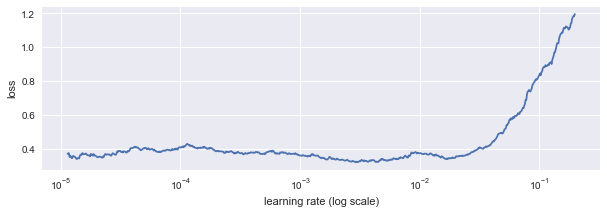

In [122]:
lrf=learn.lr_find()
learn.sched.plot()

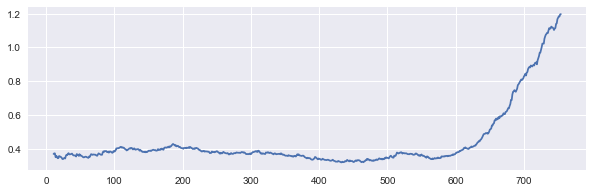

 72%|███████▏  | 758/1050 [00:50<00:19, 15.16it/s, loss=1.28]

In [123]:
learn.sched.plot_loss()